In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Introduction 

In this notebook I am going to calculate the diffusion constant values for a 2D random walker.
I will model two different random walker. 

1. Random walker with constant step size
2. Random walker with random step size

# Results and Discussion

As we know, the variance of random walke can be written as the following (according to the dimension of randomwalker)


$\sigma ^2  = 2dD\Delta t $ 

in which d is the dimention of the random walker

Throughout these simulations I calculated the value of D as following:

### 1. 2D Random Walker with constant step size:
The calculated value was $\sigma^2 = (0.21107 \pm 0.01489)x + (-0.15249 \pm 0.13006) $

So:

$4D = 0.21107 \pm 0.01489  \rightarrow D = 0.0527675 \pm 0.0037225$

### 1. 2D Random Walker with random step size:
The calculated value was $\sigma^2 = (0.07168 \pm 0.00453)x + (-0.04893 \pm 0.10742) $

So:

$4D = 0.07168 \pm 0.00453 \rightarrow D = 0.01792 \pm 0.00113 $

In [432]:
0.07168/4, 0.00453/4


(0.01792, 0.0011325)

## 2D random walker with constant step size

In [380]:
def runRandomWalker(nSteps, returnwithArray=False):
    moves = np.array([[0,1],[0,-1],[1,0],[-1,0]],dtype='int')
    position = np.zeros(2,dtype='int')
    position = np.zeros(2,dtype='int')
    
    if returnwithArray==False:
        for i in range(nSteps):
            index = np.floor(np.random.random()*4).astype('int')
            dPosition = moves[index]
            position += dPosition
        return position
    
    else:
        positionList = np.zeros((nSteps,2),dtype='int')
        for i in range(nSteps):
            positionList[i,:] = position
            index = np.floor(np.random.random()*4).astype('int')
            dPosition = moves[index]
            position += dPosition

        return positionList
    
def runEnsembleOfWalkers(Nensemble, nSteps):
    endPoints = np.zeros(Nensemble)
    for i in range(Nensemble):
        endPoint = runRandomWalker(nSteps)
        endPoints[i] = np.linalg.norm(endPoint)
        
    return endPoints
    
    
        
        
        

#### Representation of RandomWalker

In [381]:
positionList = runRandomWalker(10000, returnwithArray=True)

(-105.45, 36.45, -23.35, 118.55000000000001)

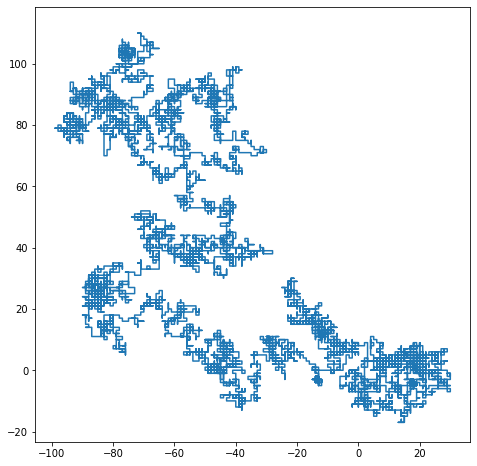

In [382]:
plt.figure(figsize=(8,8))
plt.plot(positionList[:,0], positionList[:,1])
plt.axis('square')

In [383]:
n_randomwalkers = 30
nSteps = 1000
endPoints = np.zeros((n_randomwalkers, nSteps))
for random_walker in range(n_randomwalkers):
    positionList = runRandomWalker(nSteps, returnwithArray=True)
    distance = (positionList[:,0]**2 + positionList[:,1]**2)**0.5
    endPoints[random_walker,:] = distance
    

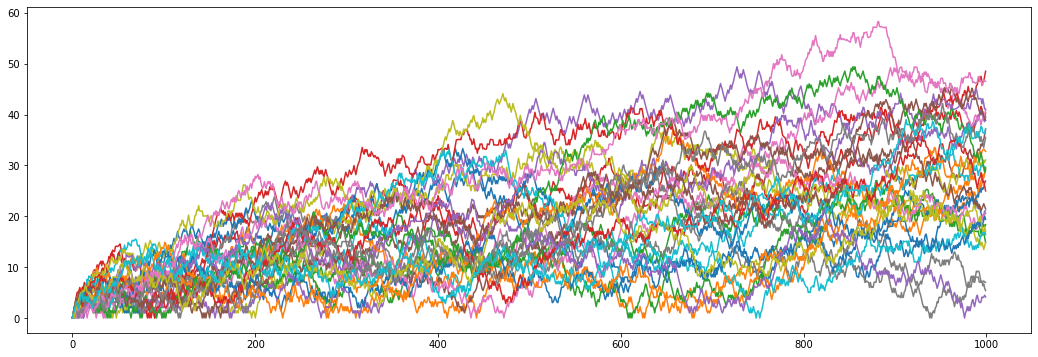

In [384]:
plt.figure(figsize=(18,6))
_ = plt.plot(endPoints.T)

In [385]:
endPoint = runRandomWalker(10000)
endPoint

array([ 81, -17])

### Calculating the Diffusion Coefficient

In [386]:
nStepsRange = np.arange(1,100)
nEnsemble = 400
varList = np.zeros(nStepsRange.shape[0])
for step in nStepsRange:
    endPoints = runEnsembleOfWalkers(nEnsemble, step)
    varList[step-1] = endPoints.var()

    

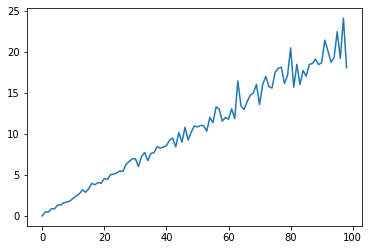

In [387]:
plt.plot(varList)

In [389]:
a,b = np.polyfit(nStepsRange, varList,1)


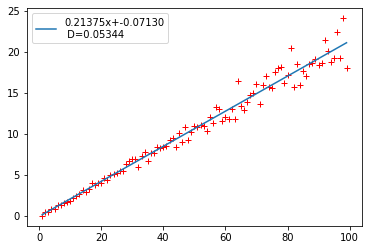

In [390]:
plt.plot(nStepsRange, varList, 'r+')
plt.plot([nStepsRange[0], nStepsRange[-1]],[a*nStepsRange[0]+b, a*nStepsRange[-1]+b], label = f'{a:2.5f}x+{b:2.5f}\n D={a/4:2.5f}')
plt.legend()

### Faster way to implement (please see the FasterApproachForRandomWalkComputing.ipynb)

In [325]:
def runRandomWalker(nSteps, returnwithArray=False):
    moves = np.array([[0,1],[0,-1],[1,0],[-1,0]],dtype='int')
    position = np.zeros(2,dtype='int')
    
    if returnwithArray==False:
        for i in range(nSteps):
            index = np.floor(np.random.random()*4).astype('int')
            dPosition = moves[index]
            position += dPosition
        return position
    
    else:
        positionList = np.zeros(nSteps,dtype='int')
        for i in range(nSteps):
            positionList[i] = np.linalg.norm(position)
            index = np.floor(np.random.random()*4).astype('int')
            dPosition = moves[index]
            position += dPosition

        return positionList
    
def runEnsembleToCalculateSlope(maxNSteps, nEnsembleWalker, nEnsembleSlope):
    dataMatrix = np.zeros((nEnsemble,maxNSteps),dtype='int')
    fitList = np.zeros((nEnsembleSlope,2),dtype='float')
    stepsRange = np.arange(maxNSteps)

    
    for slope in range(nEnsembleSlope):
        for walker in range(nEnsemble):
            dataMatrix[walker,:] = runRandomWalker(maxNSteps, returnwithArray=True)
        
        varList = dataMatrix.var(axis=0)
        a,b = np.polyfit(stepsRange, varList,1)
        
        fitList[slope,:]=[a,b]
        
    return fitList


    

In [282]:
maxNSteps = 100
nEnsemble = 1000
dataMatrix = np.zeros((nEnsemble,maxNSteps),dtype='int')
stepsRange = np.arange(maxNSteps)

for walker in range(nEnsemble):
    dataMatrix[walker,:] = runRandomWalker(maxNSteps, returnwithArray=True)


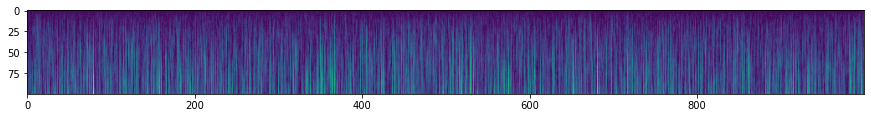

In [283]:
plt.figure(figsize=(15,10))
plt.imshow(dataMatrix.T)


In [284]:
varList = dataMatrix.var(axis=0)
meanList = dataMatrix.mean(axis=0)

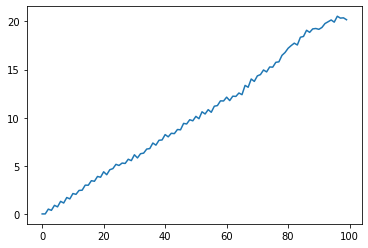

In [286]:
plt.plot(stepsRange,varList)

In [318]:
a,b = np.polyfit(stepsRange, varList,1)

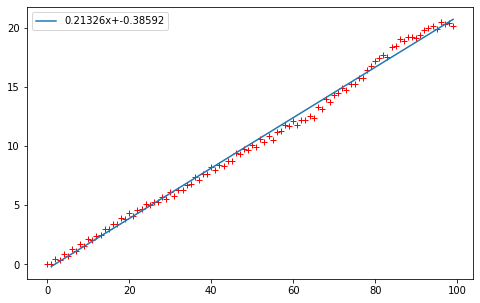

In [323]:
plt.figure(figsize=(8,5))
plt.plot(stepsRange, varList, 'r+')
plt.plot([stepsRange[i] for i in [1,-1]], [a*stepsRange[i]+b for i in [1,-1]], label=f"{a:2.5f}x+{b:2.5f}")
plt.legend()

In [364]:
maxNSteps = 100
nEnsembleWalker = 300
nEnsembleSlope = 500
fitsList = runEnsembleToCalculateSlope(maxNSteps, nEnsembleWalker, nEnsembleSlope)


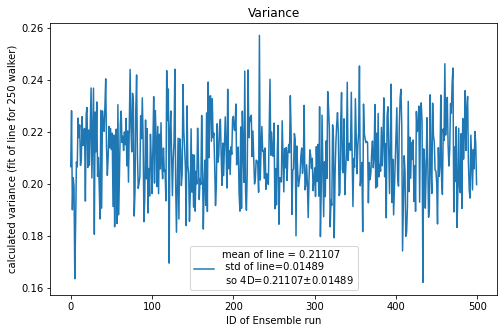

In [365]:
plt.figure(figsize=(8,5))
mean = fitsList[:,0].mean()
std = fitsList[:,0].std()
plt.plot(fitsList[:,0], label=f"mean of line = {mean:2.5f}\n std of line={std:2.5f}\n so 4D={mean:2.5f}$\pm${std:2.5f}")
plt.title("Variance")
plt.xlabel("ID of Ensemble run")
plt.ylabel("calculated variance (fit of line for 250 walker)")
plt.legend()

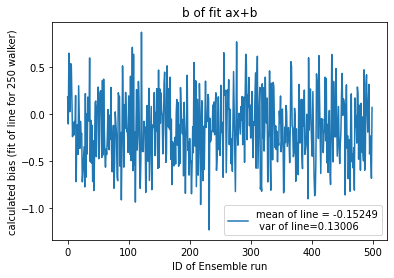

In [369]:
plt.plot(fitsList[:,1], label=f"mean of line = {fitsList[:,1].mean():2.5f}\n var of line={fitsList[:,1].var():2.5f}")
plt.title("b of fit ax+b")
plt.xlabel("ID of Ensemble run")
plt.ylabel("calculated bias (fit of line for 250 walker)")
plt.legend()

## 2D random walker with random step size

In [424]:
def runRandomWalker(nSteps):
    position = np.zeros(2,dtype='float')
    positionList = np.zeros((nSteps),dtype='float')
    moves = np.array([[0,1],[0,-1],[1,0],[-1,0]],dtype='float')
    for i in range(nSteps):
        stepSize = np.random.random()
        moves *= stepSize
        positionList[i] = np.linalg.norm(position)
        index = np.floor(np.random.random()*4).astype('int')
        dPosition = moves[index]
        position += dPosition
        moves = np.array([[0,1],[0,-1],[1,0],[-1,0]],dtype='float')

    return positionList
    
def runEnsembleOfWalkers(Nensemble, nSteps):
    endPoints = np.zeros(Nensemble)
    for i in range(Nensemble):
        endPoint = runRandomWalker(nSteps)
        endPoints[i] = np.linalg.norm(endPoint)
        
    return endPoints
    
    
def runEnsembleToCalculateSlope(maxNSteps, nEnsembleWalker, nEnsembleSlope):
    dataMatrix = np.zeros((nEnsemble,maxNSteps),dtype='int')
    fitList = np.zeros((nEnsembleSlope,2),dtype='float')
    stepsRange = np.arange(maxNSteps)

    
    for slope in range(nEnsembleSlope):
        for walker in range(nEnsemble):
            dataMatrix[walker,:] = runRandomWalker(maxNSteps)
        
        varList = dataMatrix.var(axis=0)
        a,b = np.polyfit(stepsRange, varList,1)
        
        fitList[slope,:]=[a,b]
        
    return fitList


    
    

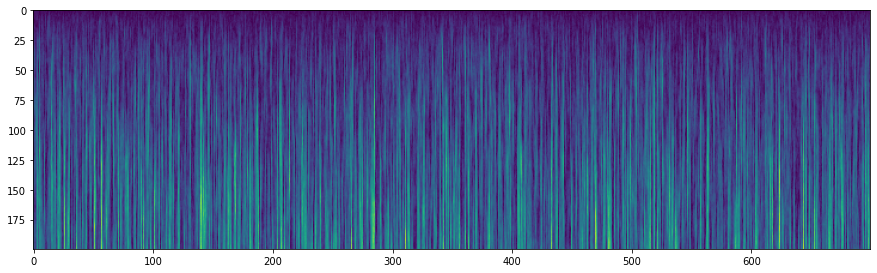

In [407]:
maxNSteps = 200
nEnsemble = 700
dataMatrix = np.zeros((nEnsemble,maxNSteps),dtype='float')
stepsRange = np.arange(maxNSteps)

for walker in range(nEnsemble):
    dataMatrix[walker,:] = runRandomWalker(maxNSteps)


plt.figure(figsize=(15,10))
plt.imshow(dataMatrix.T)


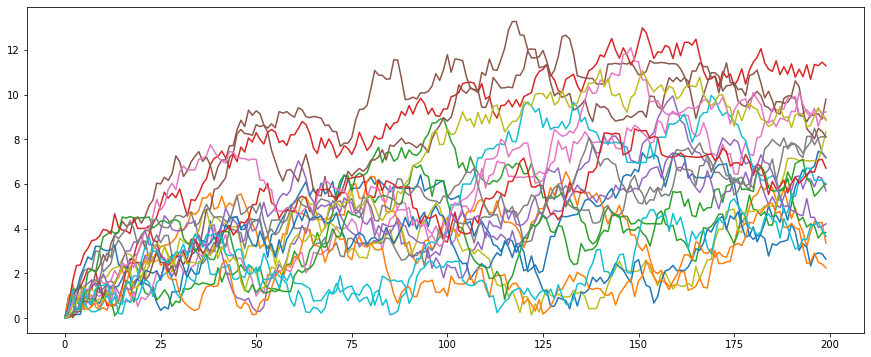

In [412]:
plt.figure(figsize=(15,6))
_ = plt.plot(dataMatrix[:20,:].T)

In [415]:
varList = dataMatrix.var(axis=0)
meanList = dataMatrix.mean(axis=0)
stepsRange = np.arange(varList.shape[0])

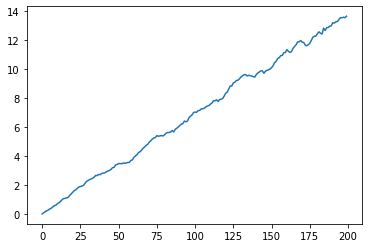

In [416]:
plt.plot(stepsRange, varList)

In [417]:
a,b = np.polyfit(stepsRange, varList,1)

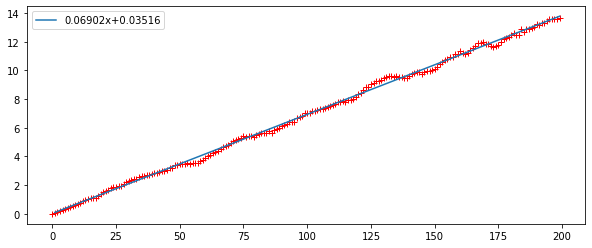

In [422]:
plt.figure(figsize=(10,4))
plt.plot(stepsRange, varList, '+r')
plt.plot([stepsRange[i] for i in [1,-1]], [a*stepsRange[i]+b for i in [1,-1]], label=f"{a:2.5f}x+{b:2.5f}")
plt.legend()

In [425]:
maxNSteps = 100
nEnsembleWalker = 300
nEnsembleSlope = 100
fitsList = runEnsembleToCalculateSlope(maxNSteps, nEnsembleWalker, nEnsembleSlope)


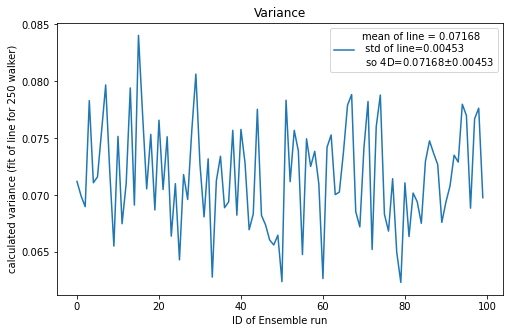

In [430]:
plt.figure(figsize=(8,5))
mean = fitsList[:,0].mean()
std = fitsList[:,0].std()
plt.plot(fitsList[:,0], label=f"mean of line = {mean:2.5f}\n std of line={std:2.5f}\n so 4D={mean:2.5f}$\pm${std:2.5f}")
plt.title("Variance")
plt.xlabel("ID of Ensemble run")
plt.ylabel("calculated variance (fit of line for 250 walker)")
plt.legend()

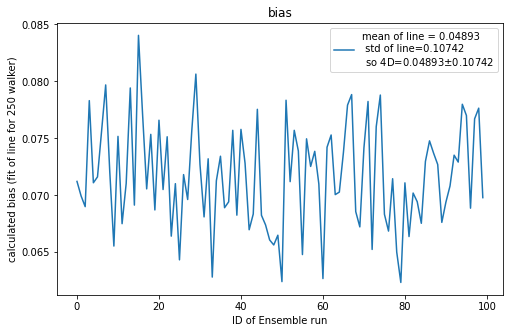

In [431]:
plt.figure(figsize=(8,5))
mean = fitsList[:,1].mean()
std = fitsList[:,1].std()
plt.plot(fitsList[:,0], label=f"mean of line = {mean:2.5f}\n std of line={std:2.5f}\n so 4D={mean:2.5f}$\pm${std:2.5f}")
plt.title("bias")
plt.xlabel("ID of Ensemble run")
plt.ylabel("calculated bias (fit of line for 250 walker)")
plt.legend()